In [4]:
from run_tracker import *

os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # use the gpu 0
# tb_100 = open('/home/wilsontsang/tracking_benchmark/dataset/OTB-benchmark.txt')  # open the file as a file
### select sequence
tb_100 = open('/home/wilsontsang/tracking_benchmark/dataset/ALL_OTB.txt')  # open the file as a file
# tb_100 = open('/home/wilsontsang/tracking_benchmark/dataset/hard-OTB.txt')  # open the file as a file
seq_list = tb_100.readlines()  # Read until EOF using readline() and return a list containing the lines thus read.
names = sorted([x.split('\t')[0].strip() for x in seq_list])  # x is each line, strip can remove the white space
# e.x. x is 'Basketball	IV, OCC, DEF, OPR, BC', after split and strip we get Basketball

# origin seed (all otb)
# np.random.seed(123)
# torch.manual_seed(456)
# torch.cuda.manual_seed(789)

# 2nd new_OTB
# np.random.seed(12356)
# torch.manual_seed(45656)
# torch.cuda.manual_seed(78956)
# np.random.seed(1234)
# torch.manual_seed(4564)
# torch.cuda.manual_seed(7894)
# 3rd
np.random.seed(912873)
torch.manual_seed(477456)
torch.cuda.manual_seed(1212974)


In [5]:
print(opts['model_path'])
opts['model_path'] = "../models/pymdnet-vot-attmask2-conv1&se3&loss3-1024.pth"
print(opts['model_path'])

../models/pymdnet-vot-attmask2-conv1&se3&loss3-1024.pth
../models/pymdnet-vot-attmask2-conv1&se3&loss3-1024.pth


Basketball
Biker
Bird1
Bird2
BlurBody
BlurCar1
BlurCar2
BlurCar3
BlurCar4
BlurFace
BlurOwl
Board
Bolt
Bolt2
Box
Boy
Car1
Car2
Car24
Car4
CarDark
CarScale
ClifBar
Coke
Couple
Coupon
Crossing
Crowds
Dancer
Dancer2
David
David2
David3
Deer
Diving
Dog
Dog1
Doll
DragonBaby
Dudek
FaceOcc1
FaceOcc2
Fish
FleetFace
Football
Football1
Freeman1
Freeman3
Freeman4
Girl
Girl2
Gym
Human2
Human3
Human4.2
Human5
Human6
Human7
Human8
Human9
Ironman
conv3_se_weight have already in param, so plus _2
conv3_se_bias have already in param, so plus _2
Frame 1/166, Overlap 0.844, Score 1.693, Time 0.337
Frame 2/166, Overlap 0.813, Score 1.507, Time 0.322
Frame 3/166, Overlap 0.741, Score 0.349, Time 0.349
Frame 4/166, Overlap 0.376, Score 0.336, Time 0.320
Frame 5/166, Overlap 0.373, Score -1.611, Time 0.308
Frame 6/166, Overlap 0.250, Score -0.153, Time 0.306
Frame 7/166, Overlap 0.167, Score -0.383, Time 0.311
Frame 8/166, Overlap 0.501, Score 0.766, Time 0.322
Frame 9/166, Overlap 0.617, Score 1.005, Time 0.

Frame 144/166, Overlap 0.013, Score -10.109, Time 0.303
Frame 145/166, Overlap 0.285, Score -3.995, Time 0.305
Frame 146/166, Overlap 0.328, Score -6.513, Time 0.304
Frame 147/166, Overlap 0.195, Score -6.336, Time 0.307
Frame 148/166, Overlap 0.129, Score -8.064, Time 0.304
Frame 149/166, Overlap 0.071, Score -7.162, Time 0.304
Frame 150/166, Overlap 0.029, Score -7.414, Time 0.304
Frame 151/166, Overlap 0.000, Score -6.282, Time 0.305
Frame 152/166, Overlap 0.033, Score -8.436, Time 0.312
Frame 153/166, Overlap 0.143, Score -12.806, Time 0.304
Frame 154/166, Overlap 0.118, Score -10.516, Time 0.307
Frame 155/166, Overlap 0.089, Score -6.315, Time 0.305
Frame 156/166, Overlap 0.028, Score -13.845, Time 0.384
Frame 157/166, Overlap 0.000, Score -13.760, Time 0.305
Frame 158/166, Overlap 0.000, Score -11.693, Time 0.311
Frame 159/166, Overlap 0.000, Score -16.396, Time 0.304
Frame 160/166, Overlap 0.000, Score -13.407, Time 0.304
Frame 161/166, Overlap 0.000, Score -15.888, Time 0.308
F

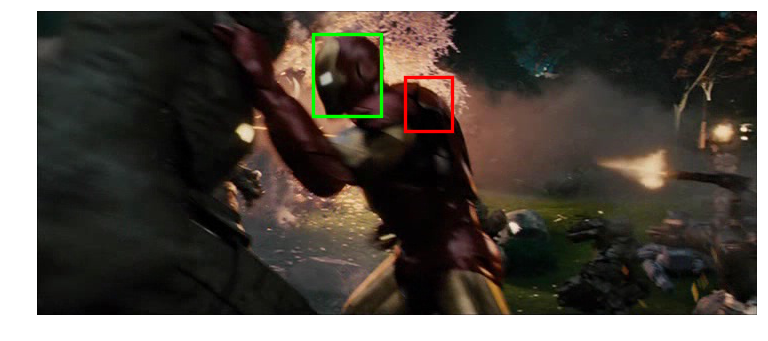

In [6]:
for seq in names:
    args = argparse.ArgumentParser()  # create an ArgumentParser
    args.seq = seq
    args.display = False
    args.json = ''
    ### 是否保存跟踪实例图？？？
    args.savefig = True
    t_name = 'attmask2-conv1&se3&loss3_5'
    args.save_home = '../result_fig_pyMDNet_' + t_name #实例图的地址
    args.result_home = '../result_pyMDNet_' + t_name  #.mat的地址

    # Generate sequence config
    img_list, init_bbox, gt, savefig_dir, display, result_path = gen_config(args)

    
    ### 路径
    result_path = args.result_home + '/' +seq+'_pyMDNet_' + t_name + '.mat'
    # if (seq == 'David' or seq == 'Football1' or seq == 'Freeman3' or seq == 'Freeman4' or seq == 'Diving')==False:
    #     continue
    # if (seq != 'Tiger1'):
    #     continue
    # Run tracker
    if not os.path.exists(result_path):
        result, result_bb, fps = run_mdnet(img_list, init_bbox, gt=gt, savefig_dir=savefig_dir, display=display)

        # Save result
        res = {}
        res['res'] = result_bb.round().tolist()
        res['type'] = 'rect'
        res['fps'] = fps
        # json.dump(res, open(result_path, 'w'), indent=2)  # indent display
        A = {'res': result_bb.round().tolist(), 'type': 'rect', 'len': len(img_list), 'fps': fps}  # structure
        results = np.zeros((1,), dtype=np.object)  # cell
        results[0] = A
        scipy.io.savemat(result_path, {'results': results})

In [ ]:
# conv1&se3:    shaking
# conv1&se&loss :
#conv1&se3&loss: jump crowds diving
#conv1&se3&loss_3:    jump 
#conv1&se3&loss3_4: human3 
#conv1&se3&loss3_5: human3 ironman